In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('base-alugueis-sp.csv')
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [61]:
df.describe() # Aqui conseguimos ver diversas estatísticas básicas ao mesmo tempo e mais a frente veremos uma a uma

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


In [2]:
df.info() # Os tipos estão corretos e sem valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [3]:
df.isna().sum() # Mostrando de maneira mais óbvia que não existem nulos

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

 Como podemos observar abaixo, a medida que o número de banheiros, garagens e a área construída aumentam nós temos o aluguel mais caro e um valor total que também é maior. 


In [4]:
df.min() # O menor valor de aluguel é de 500 reais com total de 509

address     25 de Março
district      Aclimação
area                  0
bedrooms              0
garage                0
type        Apartamento
rent                500
total               509
dtype: object

In [5]:
df.max() # O aluguel mais caro é 25 mil reais com 28 mil e 700 de total

address       dos Pinheiros
district          Água Rasa
area                    580
bedrooms                  6
garage                    6
type        Studio e kitnet
rent                  25000
total                 28700
dtype: object

In [6]:
df.mean() # Aqui observamos que a média do aluguel é de 3251 reais, e a média de área é de 84.7 métros quadrados 

area          84.655658
bedrooms       1.966286
garage         1.060393
rent        3250.814789
total       4080.030625
dtype: float64

In [7]:
df.median() # A mediana dos dados aponta que metade dos alugueis é de até 2415 reais e uma área de 60 m²

area          60.0
bedrooms       2.0
garage         1.0
rent        2415.0
total       3057.0
dtype: float64

In [8]:
df.corr().style.background_gradient() # Podemos observar correlações positivas entre todas as colunas.

,area,bedrooms,garage,rent,total
area,1.000000,0.727905,0.733403,0.667173,0.652128
bedrooms,0.727905,1.000000,0.656906,0.531164,0.525973
garage,0.733403,0.656906,1.000000,0.617276,0.617981
rent,0.667173,0.531164,0.617276,1.000000,0.978108
total,0.652128,0.525973,0.617981,0.978108,1.000000


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'garage'}>,
        <Axes: title={'center': 'rent'}>],
       [<Axes: title={'center': 'total'}>, <Axes: >]], dtype=object)

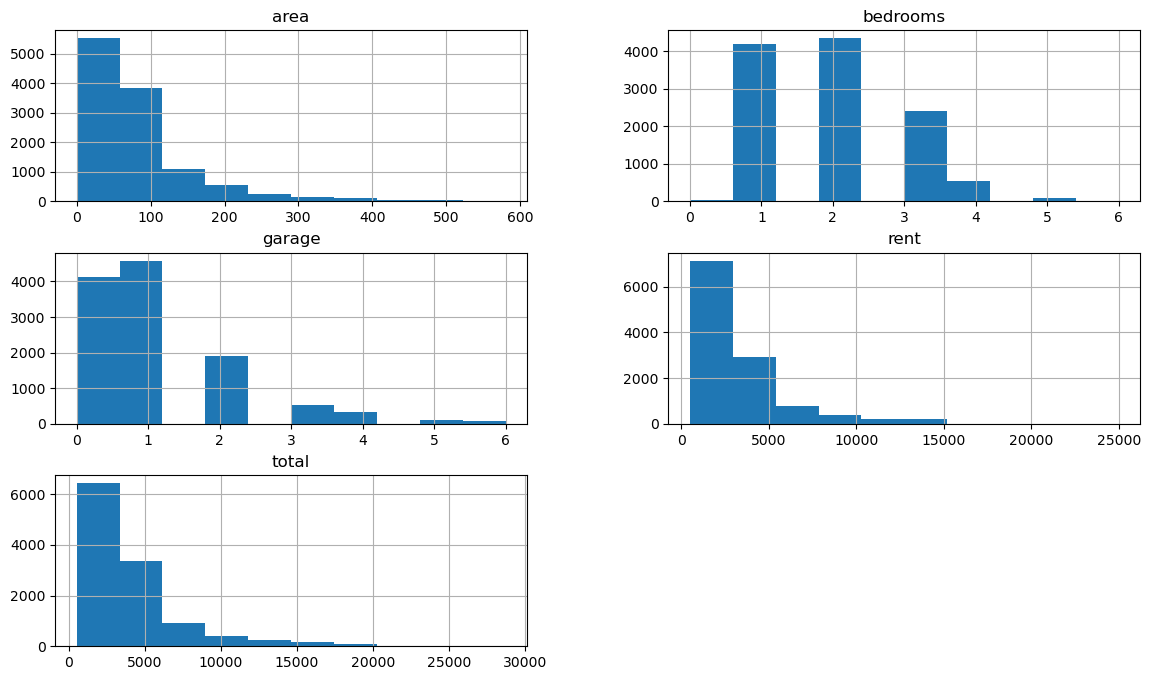

In [9]:
df.hist(figsize=(14,8))

In [10]:
df['address'].value_counts() # Podemos usar pandas.get_dummies para as variáveis 'address' e 'district', mas teríamos muitas colunas
# Essas colunas também poderiam trazer informações que tornariam nosso modelo pior (causando multicolinearidade ou Overfitting)
# Com isso em mente, optei por retirar essas variáveis e utilizar somente o tipo de apartamento

Rua da Consolação                      49
Rua Bela Cintra                        47
Avenida Brigadeiro Luís Antônio        36
Avenida Ipiranga                       32
Avenida Nove de Julho                  29
                                       ..
Rua Passo da Pátria                     1
Rua Teixeira Leite                      1
Avenida Professor Abraão de Morais      1
Rua Doutor Joaquim D'aquino Fonseca     1
Rua Abílio Borin                        1
Name: address, Length: 5348, dtype: int64

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

A seguir podemos ver um gráfico da correlação linear entre as variáveis explicativas e nossa variável resposta, retirando "rent" para que não haja vazamento de dados

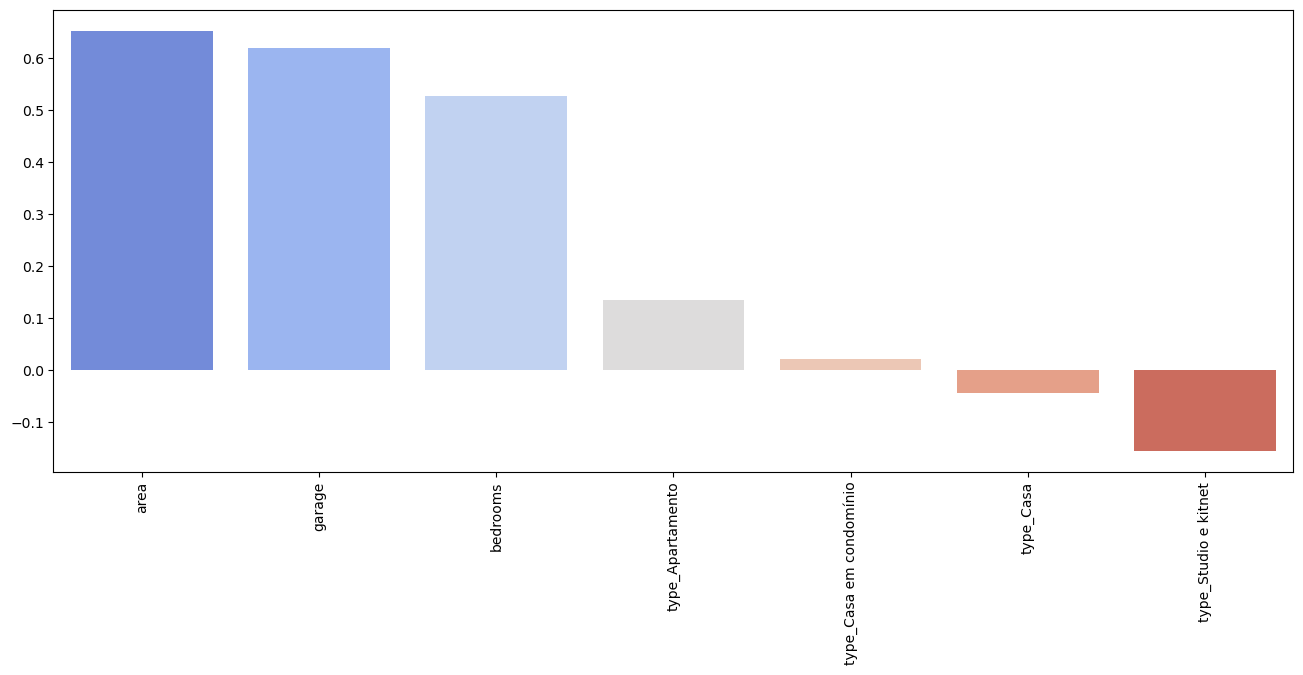

In [79]:
dummies = pd.get_dummies(df.drop('address',axis=1).drop('district',axis=1).drop('rent',axis=1))
valores = dummies.corr()['total'].sort_values(ascending=False)[1:]

fig, ax = plt.subplots(figsize= (16, 6))
sns.barplot(x=valores.index, y=valores.values, palette='coolwarm')
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('')

plt.show()

A seguir testaremos incluir o distrito para ver o impacto negativo na previsão

In [46]:
from sklearn.model_selection import train_test_split
df1 = pd.get_dummies(df.drop('address',axis=1))#.drop('district',axis=1))
x = df1.drop(['rent'],axis=1).drop(['total'],axis=1)
y= df1['total']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
X_train.columns

Index(['area', 'bedrooms', 'garage', 'district_Aclimação', 'district_Adalgisa',
       'district_Agua Branca', 'district_Alphaville',
       'district_Alphaville Centro Industrial E Empresarial/alphaville.',
       'district_Alphaville Conde Ii', 'district_Alphaville Empresarial',
       ...
       'district_Vila Água Funda', 'district_Várzea da Barra Funda',
       'district_Água Branca', 'district_Água Fria', 'district_Água Funda',
       'district_Água Rasa', 'type_Apartamento', 'type_Casa',
       'type_Casa em condomínio', 'type_Studio e kitnet'],
      dtype='object', length=1206)

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [52]:
reg.score(X_test,y_test) 

-6490267175631656.0

A pontuação obtida, -6490267175631656.0, é extremamente negativa, o que indica que o modelo de regressão linear está performando muito mal.

O método reg.score(X_test, y_test) calcula o coeficiente de determinação 
𝑅
2

 , que é uma medida estatística que determina o quão bem as previsões do modelo se ajustam aos dados observados. O valor do 
𝑅
2

  varia de -∞ a 1. Aqui está o que diferentes valores de 
𝑅
2

  significam:


R 
2
 =1: O modelo explica perfeitamente a variabilidade dos dados.

R 
2
 =0: O modelo não explica nada além da média dos dados.

R 
2
 <0: O modelo está fazendo previsões piores do que uma linha horizontal que simplesmente prediz a média dos valores de y_test.
Um valor de 
𝑅
2
R 
2
  tão negativo como -6490267175631656.0 sugere que o modelo está fazendo previsões muito piores do que a média simples dos valores de y_test. Isso pode ocorrer por diversos motivos:

In [57]:
df1 = pd.get_dummies(df.drop('address',axis=1).drop('district',axis=1))
x = df1.drop(['rent'],axis=1).drop(['total'],axis=1)
y= df1['total']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
X_train.columns

Index(['area', 'bedrooms', 'garage', 'type_Apartamento', 'type_Casa',
       'type_Casa em condomínio', 'type_Studio e kitnet'],
      dtype='object')

In [59]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [60]:
reg.score(X_test,y_test)

0.5792823903186528

Aqui, já podemos ver que retirando a variável de distrito obtivemos um ajuste bem melhor. Porém, ainda não é possível considerar este modelo
como uma boa fonte de predição. É provável que outros modelos se ajustem melhor aos dados, além disso, podem ser necessárias mais informações para melhorar a acurácia da previsão.